In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# KPI Calculation
total_employees = len(df)
attrition_count = df[df['Attrition'] == 'Yes'].shape[0]
attrition_rate = (attrition_count / total_employees) * 100

print(f"Total Employees: {total_employees}")
print(f"Current Attrition Rate: {attrition_rate:.2f}%")


df = df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)

Total Employees: 1470
Current Attrition Rate: 16.12%


In [ ]:
# LabelEncoder object
le = LabelEncoder()


for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

print(df.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                      

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# data into Features (X) and Target (y)
X = df.drop('Attrition', axis=1) # Everything except the target
y = df['Attrition']              # The target (1 = Left, 0 = Stayed)

# data into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


predictions = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, predictions))

Model Accuracy: 0.8809523809523809


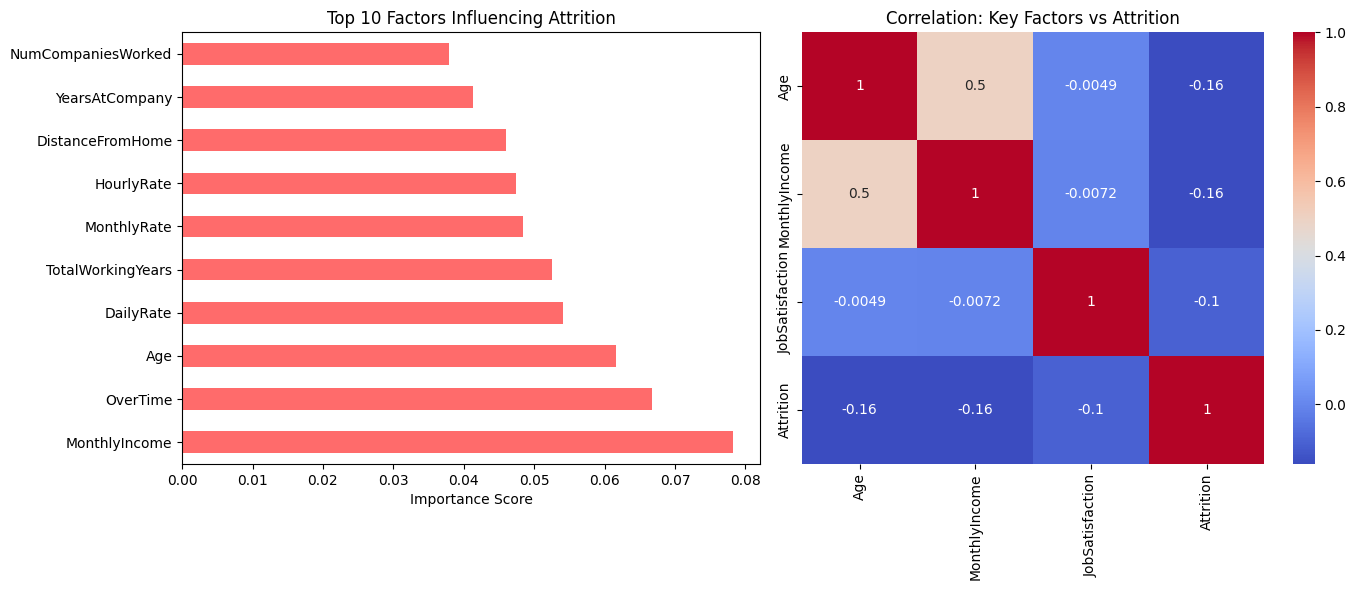

In [ ]:
# Calculate (The "Why")
importances = pd.Series(model.feature_importances_, index=X.columns)

# Plotting Dashboard
plt.figure(figsize=(14, 6))

# Subplot 1: Top 10 Drivers of Attrition
plt.subplot(1, 2, 1)
importances.nlargest(10).plot(kind='barh', color='#FF6B6B')
plt.title("Top 10 Factors Influencing Attrition")
plt.xlabel("Importance Score")

# Subplot 2: Correlation Matrix
plt.subplot(1, 2, 2)
sns.heatmap(df[['Age', 'MonthlyIncome', 'JobSatisfaction', 'Attrition']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation: Key Factors vs Attrition")

plt.tight_layout()
plt.show()